In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_absolute_error, mean_squared_error

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()

In [8]:
X=pd.DataFrame(iris.data,columns=iris.feature_names)
y=pd.Series(iris.target)



In [10]:
print("\nIris Dataset Preview:")
print(X.head())


Iris Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


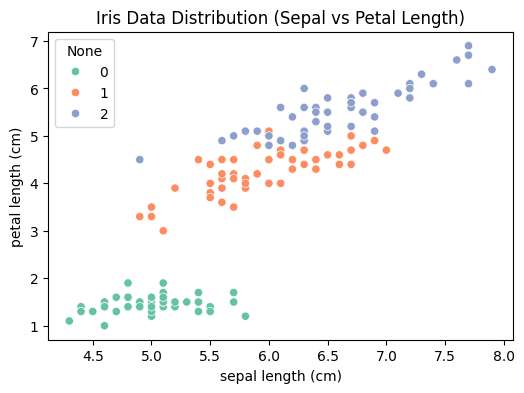

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=X["sepal length (cm)"], y=X["petal length (cm)"], hue=y, palette='Set2')
plt.title("Iris Data Distribution (Sepal vs Petal Length)")
plt.show()

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [18]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



Kernel: linear
Accuracy: 1.000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Kernel: poly
Accuracy: 0.900
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.77      1.00      0.87        10
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30


Kernel: rbf
Accuracy: 0.967
Classification Report:
              precision    recall  f1-score   support

           0       1.00

C:\Users\saila\AppData\Local\Temp\ipykernel_27244\457717008.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(svc_results.keys()), y=list(svc_results.values()), palette="coolwarm")


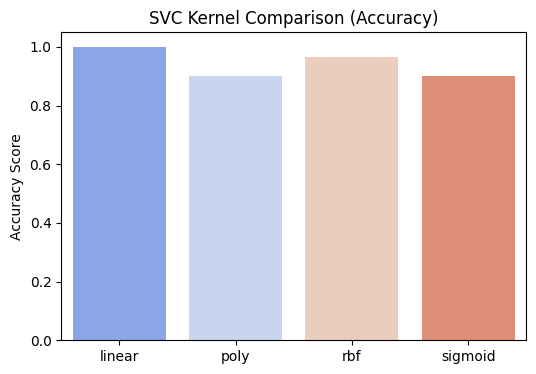

In [20]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svc_results = {}

for kernel in kernels:
    svc = SVC(kernel=kernel, C=1, gamma='auto', random_state=42)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    svc_results[kernel] = acc
    print(f"\nKernel: {kernel}")
    print(f"Accuracy: {acc:.3f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Visualization of kernel performance
plt.figure(figsize=(6,4))
sns.barplot(x=list(svc_results.keys()), y=list(svc_results.values()), palette="coolwarm")
plt.title("SVC Kernel Comparison (Accuracy)")
plt.ylabel("Accuracy Score")
plt.show()

In [ ]:
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf']
}

grid_svc = GridSearchCV(SVC(), param_grid_svc, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_svc.fit(X_train, y_train)

print("\nBest Parameters for SVC:", grid_svc.best_params_)
best_svc = grid_svc.best_estimator_
y_pred_best_svc = best_svc.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best_svc))

Fitting 3 folds for each of 18 candidates, totalling 54 fits

Best Parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
SVC(C=1, kernel='linear')
Optimized Accuracy: 1.0
